In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def shepp_logan ():
    """
    returns: [mu, a, b, x0, y0, alpha]
    """
    return [[2, .69, .92, 0, 0, 0],
            [-.9800, .6624, .8740, 0, -.0184, 0],
            [-.2200, .1100, .3100, .22, 0, -18],
            [-.2200, .1600, .4100, -.22, 0, 18],
            [.10, .2100, .2500, 0, .35, 0],
            [.10, .0460, .0460, 0, .1, 0],
            [.10, .0460, .0460, 0, -.1, 0],
            [.10, .0460, .0230, -.08, -.605, 0],
            [.10, .0230, .0230, 0, -.606, 0],
            [.10, .0230, .0460,  .06, -.605,0]]

In [11]:
def shepp_logan_phanom(n=256, phantom_type='Shepp-Logan', ellipses= None):
    if ellipses is None:
        ellipses = select_phantom(phantom_type)
    elif np.size(ellipses,1) != 6:
        raise AssertionError ("Wrong number of columns in user phantom")
    
    #generate blank image
    p = np.zeros((n, n))
    
    #pixel grid
    ygrid, xgrid = np.mgrid[-1:1:(1j*n), -1:1:(1j*n)]
    
    for ellips in ellipses:
        mu = ellips [0]
        a2  = ellips [1]**2
        b2  = ellips [2]**2
        x0  = ellips [3]
        y0  = ellips [4]
        #rotation angle in radians
        alpha = ellips[5] * - np.pi / 180
        
        # Create the offset x and y values for the grid
        x = xgrid - x0
        y = ygrid + y0
        
        cos_p = np.cos(alpha)
        sin_p = np.sin(alpha)
        
        # Find the pixels within the ellipse
        loc_ells = (((x * cos_p + y * sin_p)**2) / a2 + ((y * cos_p - x * sin_p)**2) / b2) <= 1
        
        # Add the ellipse intensity 
        p [loc_ells] += mu
        
    return p

In [12]:
def select_phantom (name):
    if (name.lower () == 'shepp-logan'):
        e = shepp_logan()
    else:
        raise ValueError ("Unknown phantom type: %s" % name)
    return e

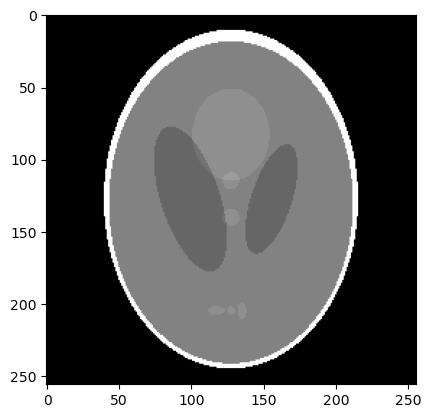

In [13]:
p = shepp_logan_phanom()
plt.imshow (p, cmap='gray')